<a href="https://colab.research.google.com/github/binliu0630/Machine_Learning/blob/master/Amazon_Comments_Sklearn_H2o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
data_path = "https://s3.amazonaws.com/tomk/h2o-world/megan/AmazonReviews.csv"
data = pd.read_csv(data_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ProductId                 100000 non-null object
UserId                    100000 non-null object
Summary                   99995 non-null object
Score                     100000 non-null int64
HelpfulnessDenominator    100000 non-null int64
Id                        100000 non-null int64
ProfileName               100000 non-null object
HelpfulnessNumerator      100000 non-null int64
Time                      100000 non-null int64
Text                      100000 non-null object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


In [4]:
data.head(3)

,ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text
0,B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1348358400,These are made in China (do not buy ANY pet fo...
1,B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1323907200,"Everything is ok, except it just isn't as good..."
2,B001PMCDK2,A14TTMM0Z03Y2W,my cat goes crazy for these!,5,0,389965,Lindsay S. Bradford,0,1310601600,Best cat treat ever. There isn't anything comp...


In [0]:
# Create label
data['Label'] = np.where(data['Score'] >= 4, 'pos','neg')

In [6]:
data['Label'].value_counts()

pos    78209
neg    21791
Name: Label, dtype: int64

**Base Model with BOW and SKLEAN**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
X = data['Text'].values[:100000]
y = data['Label'].values[:100000]

In [0]:
# Function
def clf(vectorizer, classifier, x,y, test_size, random_state=1234):
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=random_state)
    model = Pipeline([('vec', vectorizer),
                     ('clf', classifier)])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    classes = list(set(y))
    
    print(classification_report(y_test, y_pred, classes))
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    return {'model': model, 'accuracy': accuracy}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         pos       0.92      0.95      0.93     23509
         neg       0.79      0.69      0.73      6491

    accuracy                           0.89     30000
   macro avg       0.85      0.82      0.83     30000
weighted avg       0.89      0.89      0.89     30000

Accuracy: 0.8922333333333333


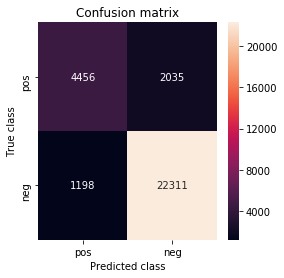

CPU times: user 1min 6s, sys: 43.2 s, total: 1min 49s
Wall time: 59 s


In [22]:
%%time
lg_count = clf(CountVectorizer(), LogisticRegression(), X, y, 0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         pos       0.90      0.96      0.93     23509
         neg       0.82      0.61      0.70      6491

    accuracy                           0.89     30000
   macro avg       0.86      0.79      0.81     30000
weighted avg       0.88      0.89      0.88     30000

Accuracy: 0.8865666666666666


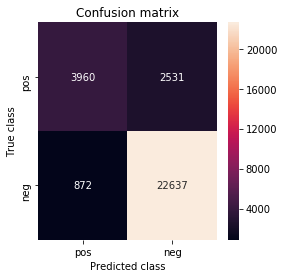

CPU times: user 11.6 s, sys: 2.69 s, total: 14.2 s
Wall time: 11.2 s


In [24]:
%%time
lg_tfidf = clf(TfidfVectorizer(), LogisticRegression(), X, y, 0.3)

              precision    recall  f1-score   support

         pos       0.83      0.99      0.90     23509
         neg       0.84      0.26      0.39      6491

    accuracy                           0.83     30000
   macro avg       0.83      0.62      0.65     30000
weighted avg       0.83      0.83      0.79     30000

Accuracy: 0.8284333333333334


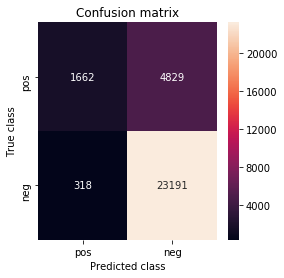

CPU times: user 1min 14s, sys: 318 ms, total: 1min 14s
Wall time: 1min 14s


In [25]:
%%time
gb_count = clf(CountVectorizer(), GradientBoostingClassifier(), X, y, 0.3)

              precision    recall  f1-score   support

         pos       0.83      0.99      0.90     23509
         neg       0.85      0.27      0.41      6491

    accuracy                           0.83     30000
   macro avg       0.84      0.63      0.66     30000
weighted avg       0.83      0.83      0.80     30000

Accuracy: 0.8320333333333333


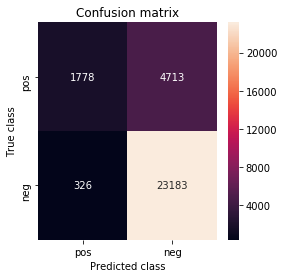

CPU times: user 3min 6s, sys: 257 ms, total: 3min 6s
Wall time: 3min 6s


In [26]:
%%time
gb_tfidf = clf(TfidfVectorizer(), GradientBoostingClassifier(), X, y, 0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         pos       0.86      0.97      0.91     23509
         neg       0.77      0.41      0.53      6491

    accuracy                           0.85     30000
   macro avg       0.81      0.69      0.72     30000
weighted avg       0.84      0.85      0.83     30000

Accuracy: 0.8458666666666667


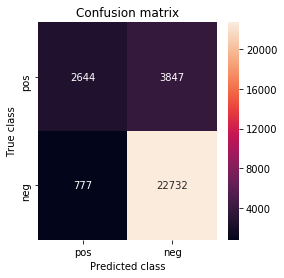

CPU times: user 31.6 s, sys: 196 ms, total: 31.8 s
Wall time: 31.7 s


In [27]:
%%time
rf_count = clf(CountVectorizer(), RandomForestClassifier(), X, y, 0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         pos       0.85      0.97      0.91     23509
         neg       0.79      0.39      0.53      6491

    accuracy                           0.85     30000
   macro avg       0.82      0.68      0.72     30000
weighted avg       0.84      0.85      0.83     30000

Accuracy: 0.8464333333333334


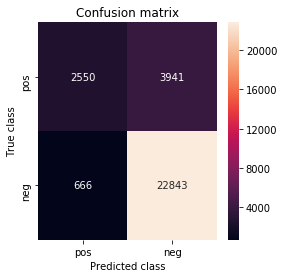

CPU times: user 28.6 s, sys: 249 ms, total: 28.8 s
Wall time: 28.6 s


In [28]:
%%time
rf_tfidf = clf(TfidfVectorizer(), RandomForestClassifier(), X, y, 0.3)

**Model with WORD EMBEDDING and H2O**

In [30]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


In [31]:
! pip install h2o

     |████████████████████████████████| 123.6MB 131kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.5-py2.py3-none-any.whl size=123672284 sha256=49b358df7ae35868d13a4b0a62bd421dcc2b3e1a40573e412c891fe080abb811
  Stored in directory: /root/.cache/pip/wheels/c9/d2/24/eeb5f07ff6826ea23325338cd3fb5754b99592a3f2b4e67f27
Successfully built h2o


In [32]:
import h2o
h2o.init(max_mem_size='12G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgu1hlzp7
  JVM stdout: /tmp/tmpgu1hlzp7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgu1hlzp7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_4qk3w6
H2O cluster total nodes:,1
H2O cluster free memory:,12 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [33]:
df = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGeneralizedLinearEstimator, H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2ODeepLearningEstimator
from h2o.automl import H2OAutoML

In [0]:
# Train w2v

STOP_WORDS = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what",
               "there","all","we","one","the","a","an","of","or","in","for","by","on",
               "but","is","in","a","not","with","as","was","if","they","are","this","and","it","have",
               "from","at","my","be","by","not","that","to","from","com","org","like","likes","so"]

def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [0]:
words = tokenize(df['Text'])

In [37]:
words.head()

C1
these
made
china
do
buy
any
pet
food
china
dogswell


In [39]:
w2v_model = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10, min_word_freq = 1)
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [41]:
h2o.save_model(w2v_model)

'/content/Word2Vec_model_python_1568919226147_1'

In [42]:
h2o.load_model('/content/Word2Vec_model_python_1568919226147_1')

Model Details
H2OWord2vecEstimator :  Word2Vec
Model Key:  Word2Vec_model_python_1568919226147_1

No model summary for this model


In [44]:
w2v_model.find_synonyms('coffee', 10)

OrderedDict([('coffe', 0.8263339400291443),
             ('coffees', 0.7952552437782288),
             ('espresso', 0.7720579504966736),
             ('expresso', 0.7394343614578247),
             ('starbucks', 0.7265386581420898),
             ('brew', 0.7204321622848511),
             ('decaf', 0.7185373902320862),
             ('brews', 0.7120282053947449),
             ('java', 0.6969894766807556),
             ('kcup', 0.6889716386795044)])

In [0]:
df_vec = w2v_model.transform(words, aggregate_method='AVERAGE')

In [0]:
df = df.cbind(df_vec)

In [0]:
df_split = df.split_frame(ratios=[0.7], seed=1234)

In [0]:
# Train classifer
predictors = df_vec.names
response = 'Label'

In [0]:
glm = H2OGeneralizedLinearEstimator(family='binomial')

In [58]:
glm.train(x=predictors, y=response, training_frame=df_split[0], validation_frame=df_split[1])

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [73]:
glm.auc(valid=True)

0.8983750956969953

In [64]:
glm.accuracy(valid=True)[0][1]

0.862533782656568

In [65]:
glm.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5406682537940015: 

,,neg,pos,Error,Rate
0,neg,3769.0,2750.0,0.4218,(2750.0/6519.0)
1,pos,1384.0,22068.0,0.059,(1384.0/23452.0)
2,Total,5153.0,24818.0,0.1379,(4134.0/29971.0)


In [66]:
#
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=df_split[0], validation_frame=df_split[1])

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [74]:
gbm.auc(valid=True)

0.8776637849446599

In [68]:
gbm.accuracy(valid=True)[0][1]

0.8459510860498481

In [69]:
gbm.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5018872929779213: 

,,neg,pos,Error,Rate
0,neg,2699.0,3820.0,0.586,(3820.0/6519.0)
1,pos,857.0,22595.0,0.0365,(857.0/23452.0)
2,Total,3556.0,26415.0,0.1561,(4677.0/29971.0)


In [70]:
# 

rf = H2ORandomForestEstimator()
rf.train(x=predictors, y=response, training_frame=df_split[0], validation_frame=df_split[1])

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [71]:
rf.auc(valid=True)

0.8942834661886664

In [75]:
rf.accuracy(valid=True)[0][1]

0.8668379433452337

In [76]:
rf.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5774387365375879: 

,,neg,pos,Error,Rate
0,neg,3520.0,2999.0,0.46,(2999.0/6519.0)
1,pos,994.0,22458.0,0.0424,(994.0/23452.0)
2,Total,4514.0,25457.0,0.1332,(3993.0/29971.0)


In [0]:
dl = H2ODeepLearningEstimator(overwrite_with_best_model=False,
  hidden=[128,128,128],            # more hidden layers -> more complex interactions
  epochs=100,                       # to keep it short enough
  score_validation_samples=10000,  # downsample validation set for faster scoring
  score_duty_cycle=0.025,          # don't score more than 2.5% of the wall time
  adaptive_rate=False,             # manually tuned learning rate
  rate=0.01, 
  rate_annealing=0.000002,            
  momentum_start=0.2,              # manually tuned momentum
  momentum_stable=0.4, 
  momentum_ramp=10000000, 
  l1=0.00001,                      # add some L1/L2 regularization
  l2=0.00001)

In [78]:
dl.train(x=predictors, y=response, training_frame=df_split[0], validation_frame=df_split[1])

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [79]:
dl.auc(valid=True)

0.8796274460576591

In [81]:
dl.accuracy(valid=True)[0][1]

0.8692966726439529

In [83]:
dl.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02558257040764862: 

,,neg,pos,Error,Rate
0,neg,1128.0,1018.0,0.4744,(1018.0/2146.0)
1,pos,309.0,7583.0,0.0392,(309.0/7892.0)
2,Total,1437.0,8601.0,0.1322,(1327.0/10038.0)
